# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


1. Get the numerical variables from our dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

dataset = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data = dataset.select_dtypes(np.number)

2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

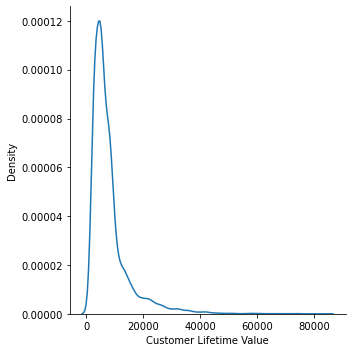

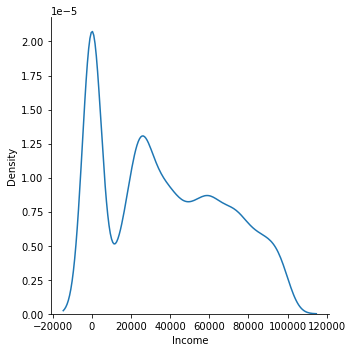

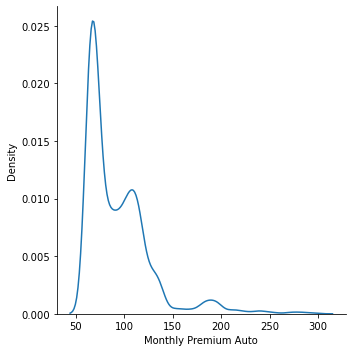

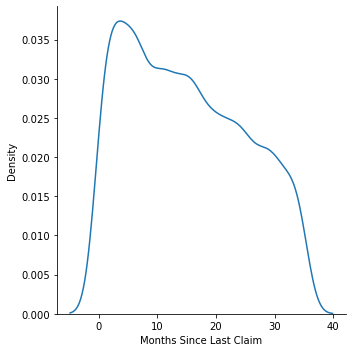

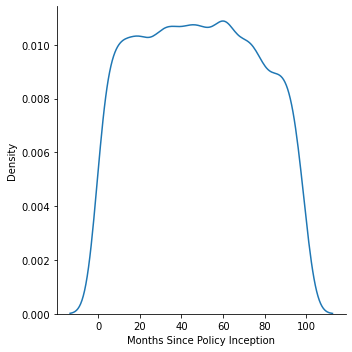

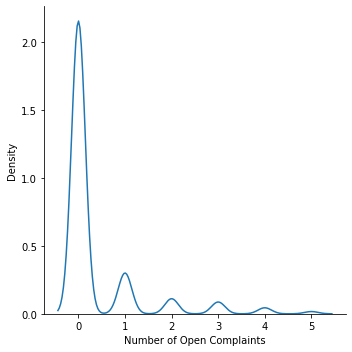

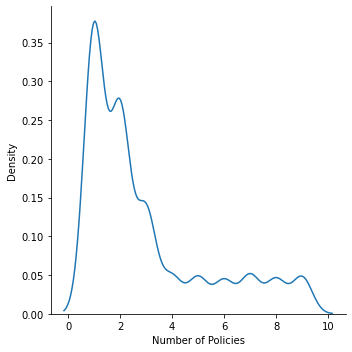

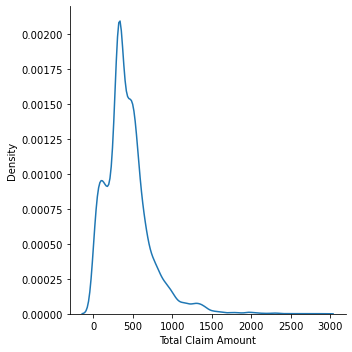

In [33]:
for i in data.columns:
    sns.displot(data=data, x=i, kind = 'kde')

The column monthly premium auto look similar to exponential distributions, starting from x = 0 from a top value then decreasing and stabilizing near the bottom. Months Since Last Claim seems to be a uniform distribution. Columns number of open complaints and number of policies seem either binomial or poisson. This leaves us with Customer Lifetime Value, Income, Months Since Policy Inception and Total Claim Amount wich all seem to have some underlying normal distribuition, very skewed though. I'm going in the next try logarithmic transformation and standard scaler on this columns to try to make them resemble more like normal distributions.

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

Log transformation

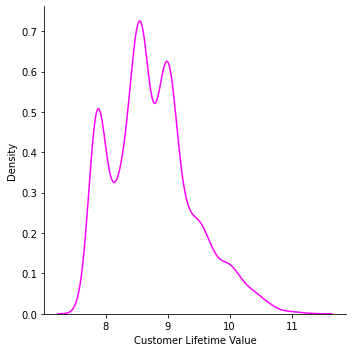

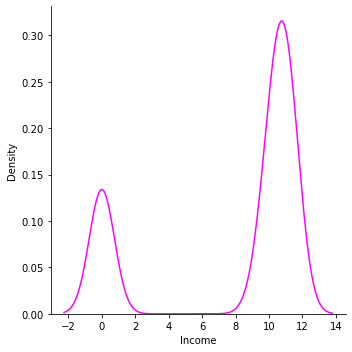

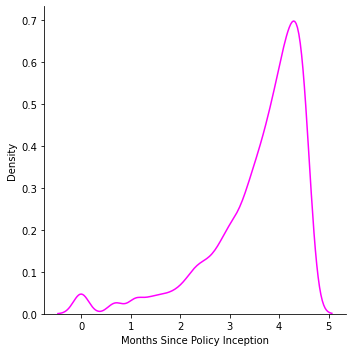

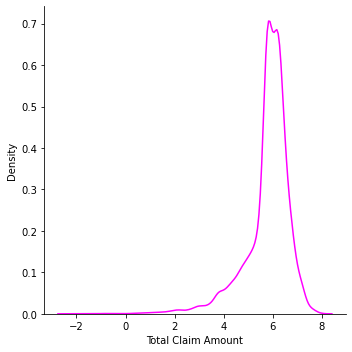

In [39]:
def log_transfom(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

data_log = pd.DataFrame()
    
for i in ['Customer Lifetime Value', 'Income', 'Months Since Policy Inception', 'Total Claim Amount']:
    data_log[i] = data[i].apply(log_transfom)
    sns.displot(data=data_log, x=i, kind = 'kde', color ="magenta")


Standard Scaler

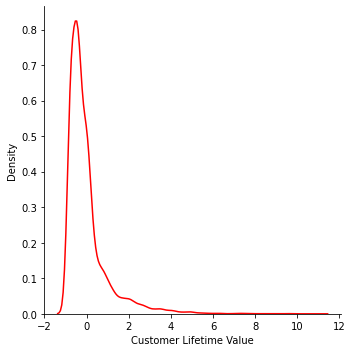

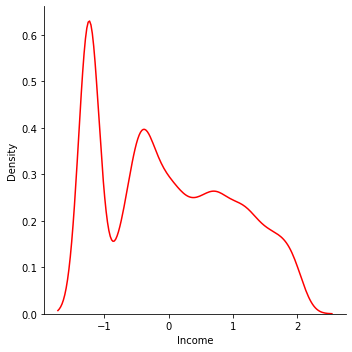

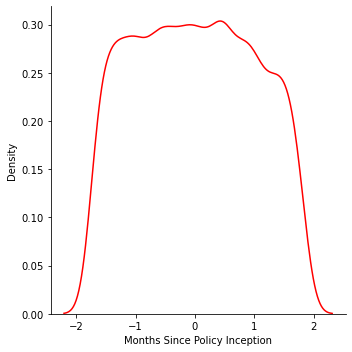

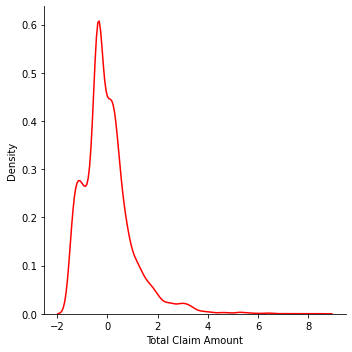

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_log = pd.DataFrame(scaler.transform(data), columns=data.columns).reset_index(drop=True)

for i in ['Customer Lifetime Value', 'Income', 'Months Since Policy Inception', 'Total Claim Amount']:
    sns.displot(data=data_log, x=i, kind = 'kde', color ="red")

Box Cox

Customer Lifetime Value Original data



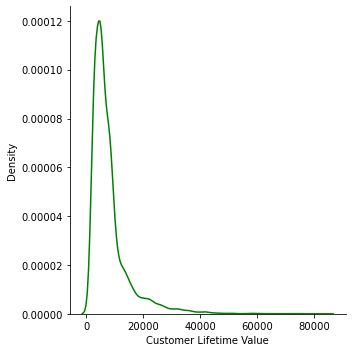

Customer Lifetime Value Fitted data



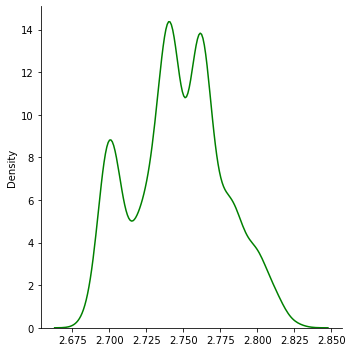

Income Original data



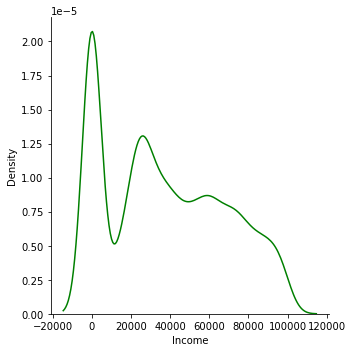

Income Fitted data



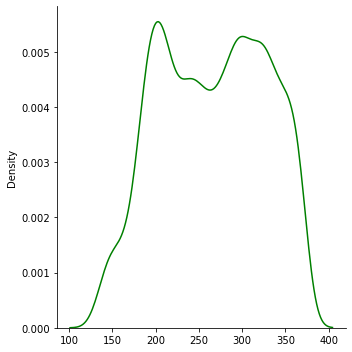

Months Since Policy Inception Original data



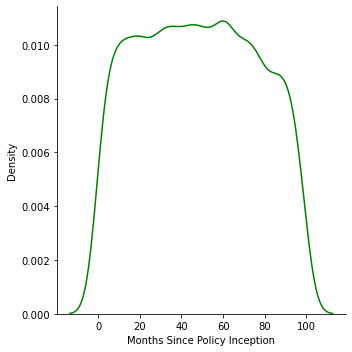

Months Since Policy Inception Fitted data



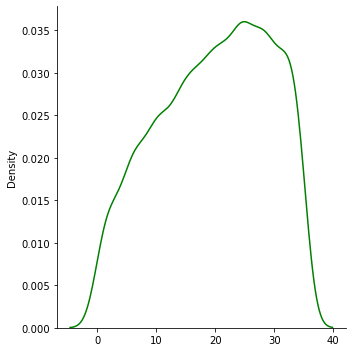

Total Claim Amount Original data



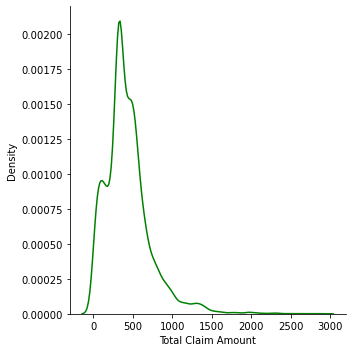

Total Claim Amount Fitted data



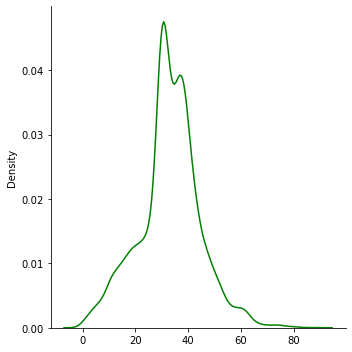

In [37]:
from scipy import stats
import matplotlib.pyplot as plt

for i in ['Customer Lifetime Value', 'Income', 'Months Since Policy Inception', 'Total Claim Amount']:
    fitted_data, fitted_lambda = stats.boxcox(data[i][data[i] > 0])

    print(i, 'Original data\n')
    sns.displot(data[i], kind = 'kde',
                label = "Non-Normal", color ="green")
    plt.show()
    print(i, 'Fitted data\n')
    sns.displot(fitted_data, kind = 'kde',
                label = "Normal", color ="green")
    plt.show()

As we can see Standard scaler does nothing to the distribution shape of the data. Log and BocCox can actually transform Customer Lifetime Value and Total Claim Amount into something resembling a normal distribution. Keep in mind that box cox requires all values to be strictly positive, so with this method all 0's are dropped.